# Play around notebook 
just checking

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import gymnasium as gym

In [30]:
from gymnasium import spaces

In [4]:
from scipy.stats import chi2

In [5]:
 metadata = {'render.modes': ['human']}

In [6]:
 metadata

{'render.modes': ['human']}

In [7]:
rate = 0.06

In [8]:
T=80

In [9]:
asset = 10**6

In [12]:
liability = chi2.pdf(np.linspace(0, 16, 101)[(101 - T):], 6)

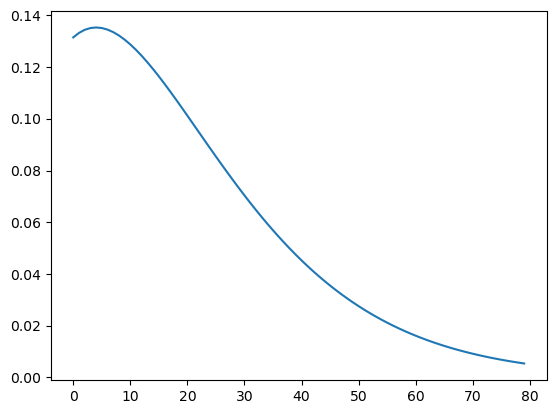

In [17]:
plt.plot(liability)

In [23]:
liab_PV = liability / (1 + rate) ** np.arange(1, T + 1)
liab_PV

array([1.24061771e-01, 1.18575599e-01, 1.12864201e-01, 1.07022132e-01,
       1.01130396e-01, 9.52574529e-02, 8.94603047e-02, 8.37856192e-02,
       7.82708397e-02, 7.29452611e-02, 6.78310496e-02, 6.29441948e-02,
       5.82953859e-02, 5.38908101e-02, 4.97328724e-02, 4.58208385e-02,
       4.21514050e-02, 3.87192001e-02, 3.55172206e-02, 3.25372106e-02,
       2.97699856e-02, 2.72057103e-02, 2.48341314e-02, 2.26447741e-02,
       2.06271033e-02, 1.87706562e-02, 1.70651490e-02, 1.55005611e-02,
       1.40672006e-02, 1.27557531e-02, 1.15573170e-02, 1.04634267e-02,
       9.46606680e-03, 8.55767761e-03, 7.73115458e-03, 6.97984226e-03,
       6.29752415e-03, 5.67840931e-03, 5.11711652e-03, 4.60865671e-03,
       4.14841413e-03, 3.73212680e-03, 3.35586658e-03, 3.01601927e-03,
       2.70926479e-03, 2.43255791e-03, 2.18310939e-03, 1.95836795e-03,
       1.75600289e-03, 1.57388755e-03, 1.41008371e-03, 1.26282673e-03,
       1.13051172e-03, 1.01168047e-03, 9.05009272e-04, 8.09297619e-04,
      

In [32]:
historical_return = pd.DataFrame(np.array([[1.277103375, 1.138939668, 1.196332479, 1.056897333],
                                                        [1.329337917, 1.220865211, 1.152575668, 1.031417750],
                                                        [1.436512041, 1.140436021, 1.119179339, 1.044573304],
                                                        [0.587765708, 1.110294883, 1.123874437, 1.059023134],
                                                        [1.826577896, 1.189505009, 1.099795940, 1.043120283],
                                                        [1.010439144, 1.170441620, 1.097598994, 1.059090683],
                                                        [0.818913771, 1.151082491, 1.116280628, 1.065031090],
                                                        [1.073968355, 1.266771188, 1.085152406, 1.058385690],
                                                        [0.845042000, 0.899819586, 1.081912809, 1.059108181],
                                                        [0.970877745, 1.145438240, 1.108091597, 1.064076166],
                                                        [0.866858640, 1.088815325, 1.132591303, 1.106734980],
                                                        [1.389351542, 1.248106035, 1.138430157, 1.062880551],
                                                        [1.268567254, 1.127940692, 1.101916922, 1.029473499],
                                                        [1.150323290, 1.130338666, 1.064204290, 1.037454821]]),
                                                        columns = ['Bovespa', 'IMA-B', 'IMA-S', 'IPCA'],
                                                        index = np.arange(2005, 2019))

In [24]:
liability = liability * (asset / np.sum(liab_PV))

In [27]:
liability

array([73459.19619178, 74423.37923305, 75088.96830879, 75474.35151152,
       75598.53256642, 75480.79845478, 75140.44442635, 74596.5487783 ,
       73867.79066968, 72972.30503542, 71927.56937205, 70750.31779837,
       69456.4783548 , 68061.13000433, 66578.47624063, 65021.83260153,
       63403.62573467, 61735.40197004, 60027.84362661, 58290.79152144,
       56533.27236118, 54763.52988368, 52989.05878122, 51216.6405816 ,
       49452.38078976, 47701.74670331, 45969.60541202, 44260.26157545,
       42577.49464605, 40924.5952686 , 39304.40064131, 37719.3286715 ,
       36171.41079872, 34662.32339329, 33193.41766717, 31765.74805917,
       30380.0990774 , 29037.01059913, 27736.80164279, 26479.59263849,
       25265.32623304, 24093.78667289, 22964.61781434, 21877.33981474,
       20831.36456138, 19826.00989726, 18860.51270363, 17934.04090008,
       17045.7044225 , 16194.56523874, 15379.64646045, 14599.94060851,
       13854.41708732, 13142.02892158, 12461.71880704, 11812.42452447,
      

In [33]:
action_space = spaces.Box(low = 0, high = 1, shape = (historical_return.shape[1] - 1,), dtype = np.float32)

In [35]:
observation_space = spaces.Box(low = -np.inf, high = np.inf, shape = liability.shape, dtype = np.float32)

Sampling from the distribution of historical returns

In [43]:
sim_ret = np.random.multivariate_normal(mean = historical_return.mean(axis = 0), cov = pd.DataFrame.cov(historical_return))

In [50]:
present_asset = asset
present_liability = liability
action = 1

In [52]:
present_asset = present_asset * np.sum(sim_ret[:-1] * action) - present_liability[0]

In [59]:
present_asset

3725866.435854074

In [61]:
present_liability = np.append(present_liability[1:], 0) * sim_ret[-1]

In [62]:
present_liability

array([76713.01676217, 77399.0827061 , 77796.3222348 , 77924.32372364,
       77802.96751846, 77452.14248798, 76891.51387375, 76140.33549973,
       75217.30022264, 74140.42323477, 72926.95348057, 71593.3090271 ,
       70155.03274213, 68626.76509022, 67022.23126215, 65354.24021174,
       63634.69349217, 61874.6020643 , 60084.1094982 , 58272.52020743,
       56448.33154871, 54619.26878873, 52792.32208921, 50973.78479113,
       49169.29239368, 47383.8617228 , 45621.92987103, 43887.39256579,
       42183.64168864, 40513.60172429, 38879.76496704, 37284.22535376,
       35728.71082833, 34214.6141728 , 32743.02226582, 31314.74375092,
       29930.33511471, 28590.12519022, 27294.23811261, 26042.61476421,
       24835.0327538 , 23671.12498093, 22550.39684054, 21472.24212665,
       20435.95769567, 19440.75695146, 18485.78221466, 17570.11603829,
       16692.79153161, 15852.80175228, 15049.10822606, 14280.64865103,
       13546.34384167, 12845.10396574, 12175.83412478, 11537.43932679,
      

In [58]:
sim_ret[:-1]

array([1.41683178, 1.23822684, 1.14426701])